<a href="https://colab.research.google.com/github/LazyHooks/Infant_Mortality_Predictor/blob/main/cluster_abg_man.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [227]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [228]:
import warnings

warnings.filterwarnings('ignore')

input

In [229]:
df = pd.read_csv("manufacturing_hires.csv")

exploratory

In [230]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 43 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Attends to Critical Detail_s5         58 non-null     int64
 1   Behaves Flexibly_s5                   58 non-null     int64
 2   Builds Relationships_s5               58 non-null     int64
 3   Champions Change_s5                   58 non-null     int64
 4   Coaches for Performance_s5            58 non-null     int64
 5   Collaborates_s5                       58 non-null     int64
 6   Communicates with Impact_s5           58 non-null     int64
 7   Displays Transparency and Candor_s5   58 non-null     int64
 8   Delegates Authority_s5                58 non-null     int64
 9   Demonstrates Resilience_s5            58 non-null     int64
 10  Develops Oneself_s5                   58 non-null     int64
 11  Drives Results_s5                     58 non-nu

In [231]:
df.head()

,Attends to Critical Detail_s5,Behaves Flexibly_s5,Builds Relationships_s5,Champions Change_s5,Coaches for Performance_s5,Collaborates_s5,Communicates with Impact_s5,Displays Transparency and Candor_s5,Delegates Authority_s5,Demonstrates Resilience_s5,...,Works Dependably_s5,Applies Political Savvy_s5,Creates Emotio0l Attachment_s5,Demonstrates Global Perspective_s5,Develops Business Opportunities_s5,Fosters Learning_s5,Generates Visio0ry Perspective_s5,Identifies Prospects_s5,Negotiates_s5,Takes Prudent Risks_s5
0,5,1,3,1,4,2,4,2,5,3,...,4,4,2,1,2,4,1,3,1,2
1,1,5,4,2,2,5,2,5,1,3,...,1,4,4,4,3,3,2,4,3,1
2,4,1,2,2,3,3,1,4,4,3,...,2,5,2,2,1,5,1,1,2,4
3,1,5,4,5,5,3,3,1,1,5,...,3,1,5,4,5,5,4,5,5,3
4,4,3,4,5,3,4,5,5,4,5,...,5,4,4,3,5,4,2,4,5,5


checks

In [232]:
df.isnull().sum()
df.describe()

,Attends to Critical Detail_s5,Behaves Flexibly_s5,Builds Relationships_s5,Champions Change_s5,Coaches for Performance_s5,Collaborates_s5,Communicates with Impact_s5,Displays Transparency and Candor_s5,Delegates Authority_s5,Demonstrates Resilience_s5,...,Works Dependably_s5,Applies Political Savvy_s5,Creates Emotio0l Attachment_s5,Demonstrates Global Perspective_s5,Develops Business Opportunities_s5,Fosters Learning_s5,Generates Visio0ry Perspective_s5,Identifies Prospects_s5,Negotiates_s5,Takes Prudent Risks_s5
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.00000,58.000000
mean,3.258621,3.155172,3.362069,3.362069,3.448276,3.293103,3.293103,3.741379,3.258621,3.275862,...,3.241379,3.620690,3.655172,3.637931,3.206897,3.362069,3.603448,3.120690,3.62069,3.310345
std,1.345041,1.225486,1.180221,1.134751,1.157317,1.242643,1.337825,1.207583,1.345041,1.166688,...,1.380444,1.281824,1.516595,0.949576,1.195879,1.372643,1.183804,1.155879,1.10545,1.391792
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,2.000000,2.000000,2.250000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,3.00000,2.000000
50%,3.500000,3.000000,4.000000,3.000000,3.500000,3.000000,3.000000,4.000000,3.500000,3.000000,...,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.00000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.750000,5.000000,4.000000,4.000000,...,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.75000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000


In [233]:
X=df

Scaling

In [234]:
cols = X.columns

In [235]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [236]:
X = pd.DataFrame(X, columns=[cols])

In [237]:
X.head()

,Attends to Critical Detail_s5,Behaves Flexibly_s5,Builds Relationships_s5,Champions Change_s5,Coaches for Performance_s5,Collaborates_s5,Communicates with Impact_s5,Displays Transparency and Candor_s5,Delegates Authority_s5,Demonstrates Resilience_s5,...,Works Dependably_s5,Applies Political Savvy_s5,Creates Emotio0l Attachment_s5,Demonstrates Global Perspective_s5,Develops Business Opportunities_s5,Fosters Learning_s5,Generates Visio0ry Perspective_s5,Identifies Prospects_s5,Negotiates_s5,Takes Prudent Risks_s5
0,1.00,0.0,0.50,0.00,0.75,0.25,0.75,0.25,1.00,0.5,...,0.75,0.75,0.25,0.00,0.25,0.75,0.00,0.50,0.00,0.25
1,0.00,1.0,0.75,0.25,0.25,1.00,0.25,1.00,0.00,0.5,...,0.00,0.75,0.75,0.75,0.50,0.50,0.25,0.75,0.50,0.00
2,0.75,0.0,0.25,0.25,0.50,0.50,0.00,0.75,0.75,0.5,...,0.25,1.00,0.25,0.25,0.00,1.00,0.00,0.00,0.25,0.75
3,0.00,1.0,0.75,1.00,1.00,0.50,0.50,0.00,0.00,1.0,...,0.50,0.00,1.00,0.75,1.00,1.00,0.75,1.00,1.00,0.50
4,0.75,0.5,0.75,1.00,0.50,0.75,1.00,1.00,0.75,1.0,...,1.00,0.75,0.75,0.50,1.00,0.75,0.25,0.75,1.00,1.00


In [238]:
X.dropna(inplace=True)
X

,Attends to Critical Detail_s5,Behaves Flexibly_s5,Builds Relationships_s5,Champions Change_s5,Coaches for Performance_s5,Collaborates_s5,Communicates with Impact_s5,Displays Transparency and Candor_s5,Delegates Authority_s5,Demonstrates Resilience_s5,...,Works Dependably_s5,Applies Political Savvy_s5,Creates Emotio0l Attachment_s5,Demonstrates Global Perspective_s5,Develops Business Opportunities_s5,Fosters Learning_s5,Generates Visio0ry Perspective_s5,Identifies Prospects_s5,Negotiates_s5,Takes Prudent Risks_s5
0,1.00,0.00,0.50,0.00,0.75,0.25,0.75,0.25,1.00,0.50,...,0.75,0.75,0.25,0.00,0.25,0.75,0.00,0.50,0.00,0.25
1,0.00,1.00,0.75,0.25,0.25,1.00,0.25,1.00,0.00,0.50,...,0.00,0.75,0.75,0.75,0.50,0.50,0.25,0.75,0.50,0.00
2,0.75,0.00,0.25,0.25,0.50,0.50,0.00,0.75,0.75,0.50,...,0.25,1.00,0.25,0.25,0.00,1.00,0.00,0.00,0.25,0.75
3,0.00,1.00,0.75,1.00,1.00,0.50,0.50,0.00,0.00,1.00,...,0.50,0.00,1.00,0.75,1.00,1.00,0.75,1.00,1.00,0.50
4,0.75,0.50,0.75,1.00,0.50,0.75,1.00,1.00,0.75,1.00,...,1.00,0.75,0.75,0.50,1.00,0.75,0.25,0.75,1.00,1.00
5,0.75,1.00,0.50,0.25,0.50,1.00,0.50,1.00,0.75,0.25,...,0.75,1.00,1.00,1.00,0.25,0.50,0.75,0.25,1.00,0.25
6,0.50,0.50,0.25,0.25,0.00,0.75,0.75,0.50,0.50,0.50,...,0.75,0.50,0.00,0.25,0.75,0.50,0.00,1.00,0.25,0.25
7,0.50,0.75,0.75,0.50,0.50,1.00,1.00,1.00,0.50,0.50,...,0.75,1.00,1.00,0.75,0.50,0.50,0.75,0.75,0.75,0.25
8,0.50,0.75,0.25,0.25,0.75,0.25,0.50,0.75,0.50,0.00,...,0.25,1.00,0.25,0.50,0.25,1.00,0.75,0.25,0.25,0.25
9,1.00,0.25,1.00,0.75,1.00,0.75,0.50,1.00,1.00,1.00,...,1.00,0.75,1.00,0.75,0.75,1.00,0.75,1.00,0.75,0.75


K means

In [239]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [240]:
kmeans.cluster_centers_

array([[0.46296296, 0.58333333, 0.37962963, 0.40740741, 0.43518519,
        0.53703704, 0.44444444, 0.60185185, 0.46296296, 0.40740741,
        0.60185185, 0.40740741, 0.40740741, 0.34259259, 0.41666667,
        0.5462963 , 0.5462963 , 0.52777778, 0.41666667, 0.41666667,
        0.34259259, 0.34259259, 0.50925926, 0.49074074, 0.46296296,
        0.46296296, 0.68518519, 0.46296296, 0.43518519, 0.47222222,
        0.37037037, 0.46296296, 0.47222222, 0.34259259, 0.68518519,
        0.41666667, 0.53703704, 0.36111111, 0.50925926, 0.5462963 ,
        0.36111111, 0.5       , 0.40740741],
       [0.65322581, 0.5       , 0.77419355, 0.75      , 0.76612903,
        0.60483871, 0.68548387, 0.75806452, 0.65322581, 0.70967742,
        0.73387097, 0.68548387, 0.70967742, 0.80645161, 0.5       ,
        0.74193548, 0.74193548, 0.7016129 , 0.74193548, 0.75806452,
        0.70967742, 0.80645161, 0.60483871, 0.65322581, 0.66129032,
        0.65322581, 0.62903226, 0.65322581, 0.71774194, 0.82258065,
   

inertia

In [241]:
kmeans.inertia_

201.31690561529274

Elbow

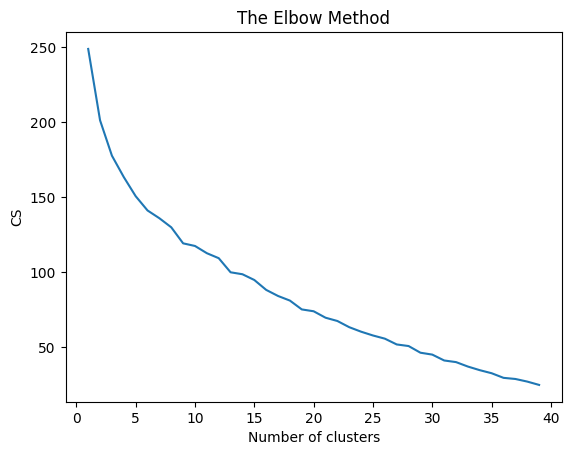

In [242]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

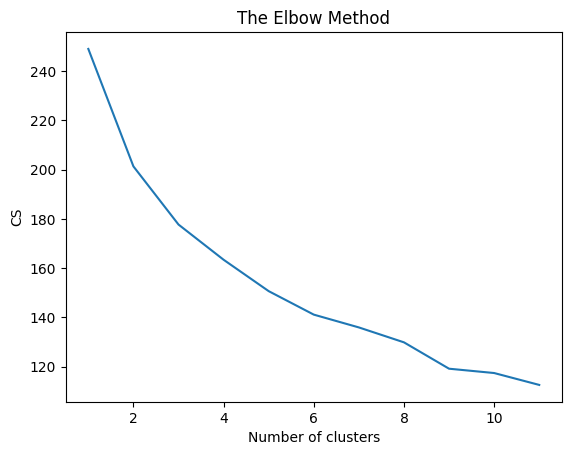

In [243]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [297]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=9, random_state=0)

In [298]:
labels=kmeans.labels_
print(labels)

[1 5 3 6 2 0 7 0 5 2 5 5 2 4 2 2 4 6 3 8 7 7 0 4 3 7 0 6 2 8 1 0 1 6 5 0 5
 6 4 2 0 6 6 1 3 1 6 5 5 3 8 3 5 8 4 1 2 0]


In [299]:
Z=kmeans.cluster_centers_
Z

array([[0.4375    , 0.75      , 0.71875   , 0.46875   , 0.6875    ,
        0.75      , 0.53125   , 0.90625   , 0.4375    , 0.4375    ,
        0.75      , 0.40625   , 0.25      , 0.90625   , 0.25      ,
        0.8125    , 0.8125    , 0.65625   , 0.28125   , 0.53125   ,
        0.3125    , 0.90625   , 0.5625    , 0.5625    , 0.59375   ,
        0.4375    , 0.90625   , 0.4375    , 0.40625   , 0.90625   ,
        0.4375    , 0.53125   , 0.90625   , 0.40625   , 0.90625   ,
        0.96875   , 0.78125   , 0.34375   , 0.5625    , 0.8125    ,
        0.34375   , 0.6875    , 0.3125    ],
       [0.875     , 0.29166667, 0.58333333, 0.41666667, 0.83333333,
        0.25      , 0.54166667, 0.45833333, 0.875     , 0.75      ,
        0.625     , 0.66666667, 0.16666667, 0.91666667, 0.70833333,
        0.54166667, 0.54166667, 0.75      , 0.45833333, 0.58333333,
        0.70833333, 0.91666667, 0.75      , 0.5       , 0.875     ,
        0.875     , 0.625     , 0.875     , 0.58333333, 0.625     ,
   

[t-SNE] Computing 57 nearest neighbors...
[t-SNE] Indexed 58 samples in 0.001s...
[t-SNE] Computed neighbors for 58 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 58 / 58
[t-SNE] Mean sigma: 1.722868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.414322
[t-SNE] KL divergence after 5000 iterations: 1.002949


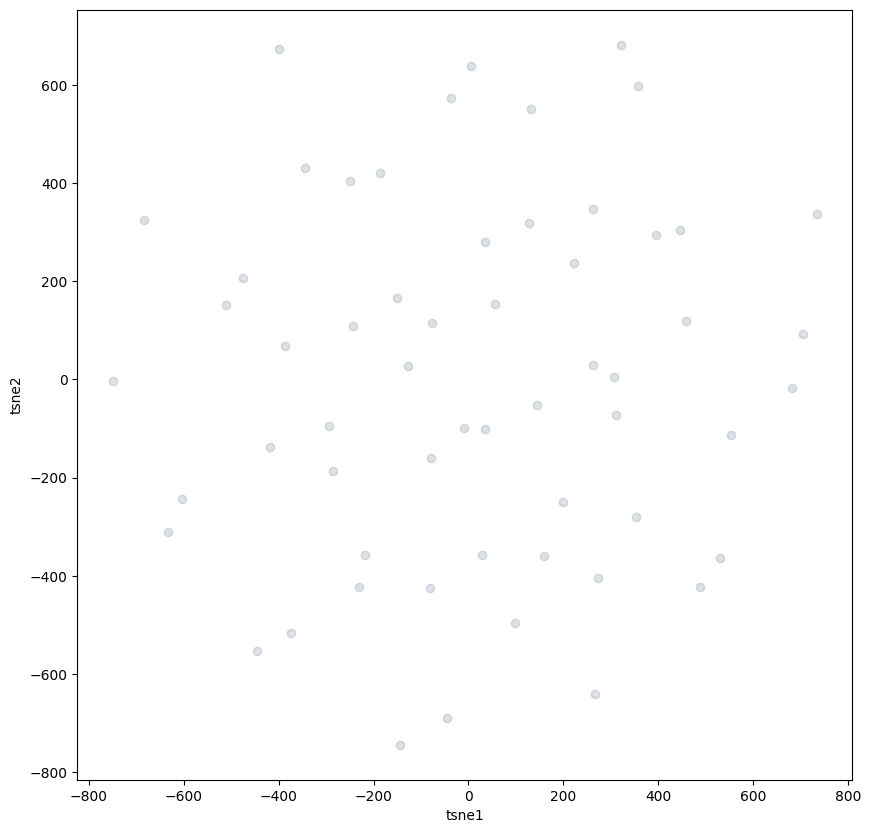

In [300]:
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [301]:
import matplotlib

In [302]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2500, learning_rate=600)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 57 nearest neighbors...
[t-SNE] Indexed 58 samples in 0.002s...
[t-SNE] Computed neighbors for 58 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 58 / 58
[t-SNE] Mean sigma: 1.722868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.401237
[t-SNE] KL divergence after 2500 iterations: 0.346251


In [303]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)

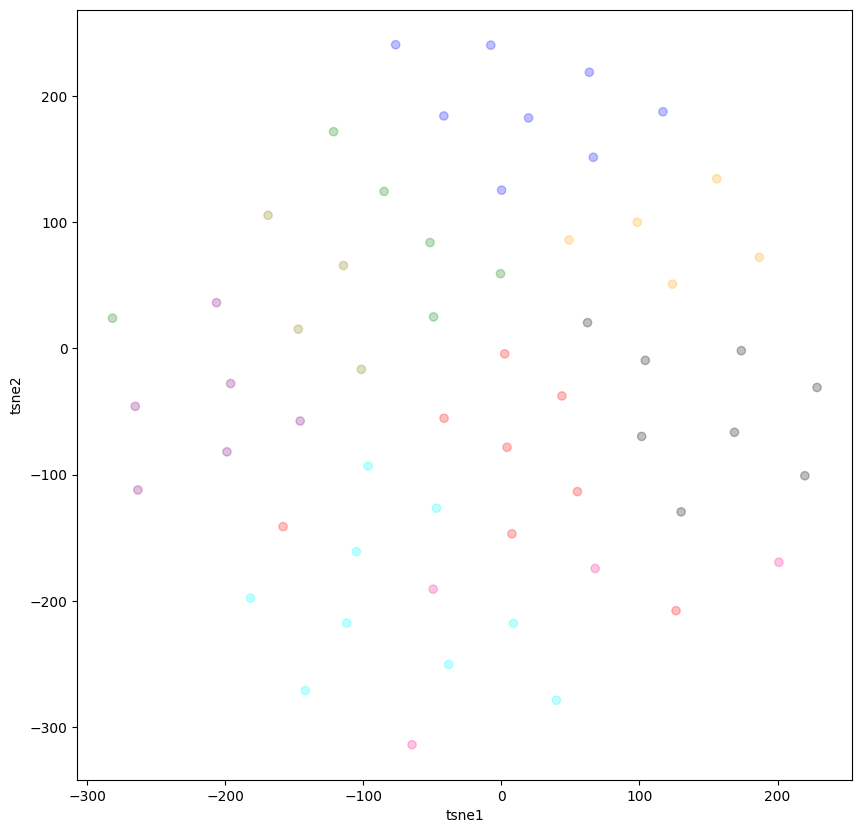

In [307]:
colors = ["red","green","blue","purple","orange","cyan","black","deeppink","olive"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [308]:
Z2 = ms.inverse_transform(Z)
Z2

array([[2.75      , 4.        , 3.875     , 2.875     , 3.75      ,
        4.        , 3.125     , 4.625     , 2.75      , 2.75      ,
        4.        , 2.625     , 2.        , 4.625     , 2.        ,
        4.25      , 4.25      , 3.625     , 2.125     , 3.125     ,
        2.25      , 4.625     , 3.25      , 3.25      , 3.375     ,
        2.75      , 4.625     , 2.75      , 2.625     , 4.625     ,
        2.75      , 3.125     , 4.625     , 2.625     , 4.625     ,
        4.875     , 4.125     , 2.375     , 3.25      , 4.25      ,
        2.375     , 3.75      , 2.25      ],
       [4.5       , 2.16666667, 3.33333333, 2.66666667, 4.33333333,
        2.        , 3.16666667, 2.83333333, 4.5       , 4.        ,
        3.5       , 3.66666667, 1.66666667, 4.66666667, 3.83333333,
        3.16666667, 3.16666667, 4.        , 2.83333333, 3.33333333,
        3.83333333, 4.66666667, 4.        , 3.        , 4.5       ,
        4.5       , 3.5       , 4.5       , 3.33333333, 3.5       ,
   

In [309]:
pd.DataFrame(Z2).to_csv('output_clusters')